# Best Neighborhood in Pittsburgh 

## Introduction

**Data sets used:** \
Crime Frequency: https://data.wprdc.org/dataset/police-incident-blotter \
Total Population: https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv \
Fire Incidents: https://data.wprdc.org/dataset/fire-incidents-in-city-of-pittsburgh \
Asthma: https://data.wprdc.org/dataset/childhood-asthma-healthcare-utilization/resource/61022ad9-c601-4152-9ba6-da915fd05be5 \
2010 Census: https://data.wprdc.org/dataset/2010-census-tracts/resource/a8d73d14-dc00-4f8c-807b-550d499f4762z \


When deciding which neighborhood in Pittsburgh is the best, I focused on three different factors. The factors were crime rate, fire incidents and asthma rate. The first factor I looked at was asthma rate. I looked at asthma rates because these offer insights into air quality within each neighborhood. Then I looked at crime rate. This factor allowed us to see how safe each neighborhood was. Lastly, I looked at fire incidents where I calculated the total number of fire incidents per neighborhood. Using these factors I was able to determine the best neighborhood by looking for the neighborhood with a low crime rate, total fire incidents and asthma rate.


# Data

In [1]:
import pandas as pd

## Asthma Rate 

In [2]:
# Reading file

asthma = pd.read_csv("pittAsthma.csv")
asthma.head()


Census_tract  ED_visits  ED_hosp  UC_visits  Asthma_use  Total_members
0   42003010300          2        0          0           6             83
1   42003020100         32       19          3         223           2114
2   42003020300          0        0          0           2             48
3   42003030500         11        3          3          61            422
4   42003040200          2        1          1          18            138

In [3]:
# Organizing file to contain only necessary columns and sorting 

asthma = asthma.rename(columns = {'Census_tract':'geoid10'})
asthma = asthma.sort_values(by=['geoid10'])
asthma = asthma.drop(columns = ['ED_visits', 'ED_hosp', 'UC_visits'])
asthma.head(8)

geoid10  Asthma_use  Total_members
0  42003010300           6             83
1  42003020100         223           2114
2  42003020300           2             48
3  42003030500          61            422
4  42003040200          18            138
5  42003040400           1             17
6  42003040500           3             44
7  42003040600           0             15

In [4]:
# Reading file

census = pd.read_csv("census.csv")
census = census[['geoid10', 'hood', 'blkgrpce10']]
census['geoid10'] = census['geoid10'] - census['blkgrpce10'] 
census = census.sort_values(by=['geoid10'])
census['geoid10'] = census['geoid10']/10
census

geoid10                       hood  blkgrpce10
63   4.200301e+10                      Bluff           3
25   4.200301e+10                      Bluff           2
26   4.200301e+10                      Bluff           1
88   4.200301e+10                      Bluff           4
6    4.200302e+10  Central Business District           4
..            ...                        ...         ...
15   4.200398e+10      Central Lawrenceville           1
73   4.200398e+10               Point Breeze           1
169  4.200398e+10                North Shore           1
65   4.200398e+10   Lincoln-Lemington-Belmar           1
112  4.200398e+10              North Oakland           1

[361 rows x 3 columns]

In [5]:
# Creating two DataFrames

dcensus = pd.DataFrame(census)
dasthma = pd.DataFrame(asthma)
dcensus.dropna()
dcensus = dcensus.reset_index(drop=True)

In [6]:
# Merging to form one combined DataFrame

dfrate = dasthma.merge(dcensus, on = 'geoid10', how = 'left')
dfrate.head(10)

geoid10  Asthma_use  Total_members                       hood  \
0  42003010300           6             83                      Bluff   
1  42003010300           6             83                      Bluff   
2  42003010300           6             83                      Bluff   
3  42003010300           6             83                      Bluff   
4  42003020100         223           2114  Central Business District   
5  42003020100         223           2114  Central Business District   
6  42003020100         223           2114  Central Business District   
7  42003020100         223           2114  Central Business District   
8  42003020100         223           2114  Central Business District   
9  42003020100         223           2114  Central Business District   

   blkgrpce10  
0         3.0  
1         2.0  
2         1.0  
3         4.0  
4         4.0  
5         6.0  
6         5.0  
7         1.0  
8         2.0  
9         3.0

In [7]:
#Calculating the Asthma rate and displaying it in ascending order
Asthma_rate = dfrate['Asthma_use'] / dfrate['Total_members']
dfrate['Asthma_rate'] = Asthma_rate
dfrate = dfrate.groupby("hood").sum()
dfrate = dfrate.sort_values(by=['Asthma_rate'])
dfrate.dropna()
dfrate.reset_index(inplace = True)
df4 = dfrate.head(20)
df4

hood      geoid10  Asthma_use  Total_members  blkgrpce10  \
0                Chateau  42003980600           0              5         1.0   
1         Strip District  42003020300           2             48         1.0   
2              Ridgemont  42003563100          28            594         3.0   
3       Allegheny Center  42003562700          10            181         2.0   
4         Allegheny West  42003562700          10            181         1.0   
5          East Carnegie  42003562800          12            211         1.0   
6                Oakwood  42003562800          12            211         2.0   
7          Regent Square  42003141000           8            134         1.0   
8      Northview Heights  42003260900          55            812         1.0   
9            North Shore  42003563200          12            175         1.0   
10         New Homestead  42003310300          11            157         1.0   
11        Chartiers City  42003563000          32            413         4.0   
12             Fairywood  42003563000          32            413         1.0   
13           Summer Hill  42003261200          12            152         1.0   
14     Arlington Heights  42003561600          38            447         1.0   
15        Swisshelm Park  42003141100          18            203         1.0   
16              Westwood  84007126200          56           1188         3.0   
17  California-Kirkbride  42003250700          20            209         1.0   
18               Bon Air  42003562400          53            522         1.0   
19         Spring Garden  84006482400          14            254         3.0   

    Asthma_rate  
0      0.000000  
1      0.041667  
2      0.047138  
3      0.055249  
4      0.055249  
5      0.056872  
6      0.056872  
7      0.059701  
8      0.067734  
9      0.068571  
10     0.070064  
11     0.077482  
12     0.077482  
13     0.078947  
14     0.085011  
15     0.088670  
16     0.094276  
17     0.095694  
18     0.101533  
19     0.110236

**Metric: The lower the asthma rate the better the neighborhood** \
low asthma rate = healthier neighborhood(best neighborhood) \
high asthma rate = less healthier neighborhood

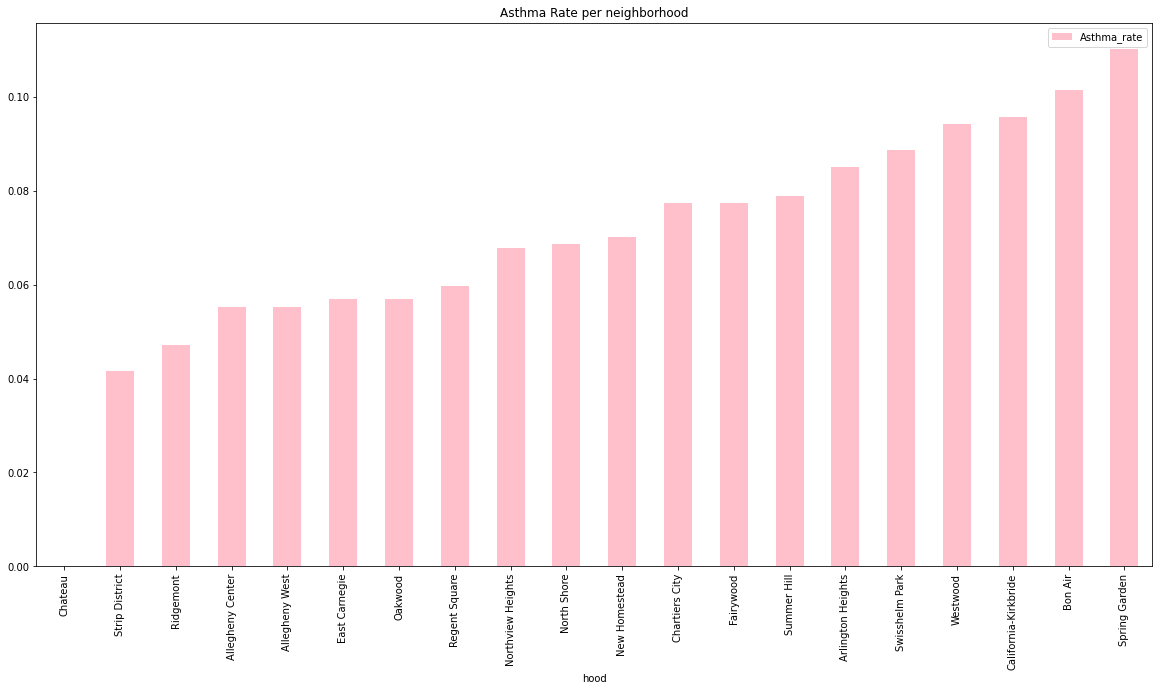

In [8]:
# Graphing the asthma rate for the first 20 neighborhoods

#df4.plot.bar(x = 'hood', y='Asthma_rate', figsize = (20,10))

df4_graph = df4[["hood", "Asthma_rate"]]
df4_graph = df4_graph.set_index("hood")
df4_graph.plot(kind = "bar", title = "Asthma Rate per neighborhood", figsize = (20,10), color = "pink")

## Crime Rate

In [9]:
#Read the file
crime = pd.read_csv("crime.csv")

#Calculated the number of crimes that occured in each neighborhood and displayed it in ascending order
crime_frequency = crime['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=True)
crime_frequency

New Homestead                  1
St. Clair                      1
Swisshelm Park                 2
Oakwood                        2
Mt. Oliver Boro                2
                            ... 
Homewood South                80
East Liberty                  81
Carrick                      111
South Side Flats             124
Central Business District    210
Name: INCIDENTNEIGHBORHOOD, Length: 94, dtype: int64

In [10]:
#Graphed the total number of crimes in each neighborhood
cf_graph = crime_frequency.plot(kind = "bar", title = "Total Crimes Committed per Neighborhood", figsize = (20,10))
cf_graph.set_xlabel("Neighborhoods", fontsize = 10)
cf_graph.set_ylabel("Crimes Committed", fontsize = 10)

Text(0, 0.5, 'Crimes Committed')

In [11]:
#Uploaded and read the population data
population = pd.read_csv("population.csv")

#Found the population per neighborhood
total_population = population[["Neighborhood" , "Estimate; Total"]]
total_population = total_population.rename(columns = {'Neighborhood': 'INCIDENTNEIGHBORHOOD','Estimate; Total': 'Population'})


#Sorted the crime dataset in ascending order again and dropped the neighborhoods that were not in the population dataset
crime_neighborhood = crime.groupby("INCIDENTNEIGHBORHOOD").count()
crime_neighborhood = crime_neighborhood[["INCIDENTLOCATION"]]
crime_neighborhood = crime_neighborhood.rename(columns = {'INCIDENTLOCATION': 'Crimes Committed'})
crime_neighborhood = crime_neighborhood.sort_values(by = ['Crimes Committed'])
crime_neighborhood = crime_neighborhood.drop(["Central North Side", "Mount Oliver", "Mt. Oliver Boro", "Outside City",
                                               "Outside County","Outside State", "South Shore", "Chateau"])


#Merged the two datasets using a common column(INCIDENTNEIGHBORHOOD)
df1 = pd.DataFrame(total_population)
df2 = pd.DataFrame(crime_neighborhood)
df3 = df2.merge(df1, on = 'INCIDENTNEIGHBORHOOD', how = 'left')


#Calculated the crime rate and displayed it in ascending order
df3["Crime Rate"] = (df3["Crimes Committed"] / df3["Population"]) * 100
df3 = df3.sort_values(by = ['Crime Rate'])
df3.reset_index(drop = True, inplace = True)
df3

INCIDENTNEIGHBORHOOD  Crimes Committed  Population  Crime Rate
0               New Homestead                 1         973    0.102775
1              Swisshelm Park                 2        1345    0.148699
2                     Oakwood                 2        1058    0.189036
3             Stanton Heights                12        4761    0.252048
4         Squirrel Hill North                30       11336    0.264644
..                        ...               ...         ...         ...
81             Homewood South                80        2276    3.514938
82                   West End                 9         235    3.829787
83             Strip District                33         747    4.417671
84  Central Business District               210        4060    5.172414
85                North Shore                19         205    9.268293

[86 rows x 4 columns]

**Metric: The lower the crime rate the better the neighborhood** \
0 = most safest(best neighborhood) \
10 = most dangerous

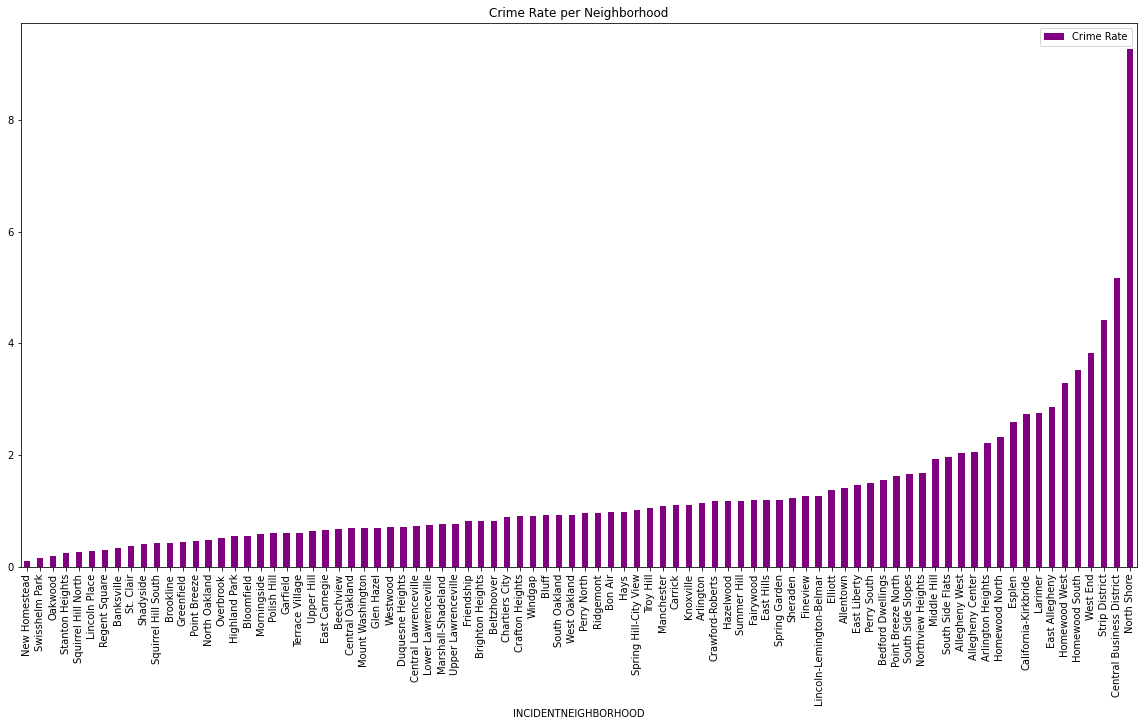

In [12]:
#Graphed the crime rate per neighborhood
cr_graph = df3[["INCIDENTNEIGHBORHOOD","Crime Rate"]]
cr_graph = cr_graph.set_index("INCIDENTNEIGHBORHOOD")
cr_graph.plot(kind = "bar", title = "Crime Rate per Neighborhood", figsize = (20,10), color = "purple")

## Fire Incidents

In [13]:
#Read the file
fire_incidents = pd.read_csv("fire_incidents.csv")

#Calculated the total number of fires per neighborhood
total_fires = fire_incidents.groupby("neighborhood").sum()
total_fires = total_fires[[ "alarms"]]

#Displayed the total number of fires per neighborhood in ascending order
total_fires = pd.DataFrame(total_fires)
total_fires = total_fires.sort_values(by = ['alarms'])
total_fires.reset_index(inplace = True)
total_fires

neighborhood  alarms
0                   Ridgemont       1
1        Mount Oliver Borough       2
2               New Homestead       2
3                        Hays       3
4               Regent Square       3
..                        ...     ...
86        Squirrel Hill South     117
87           South Side Flats     117
88   Lincoln-Lemington-Belmar     117
89  Central Business District     149
90                    Carrick     155

[91 rows x 2 columns]

**Metric: The lower the number of alarms the better the neighborhood** \
Less alarms = less fire incidents = best neighborhood \
More alarms = most fire incidents

In [14]:
#Graphed the total number of fires based on alarms per a neighborhood
tf_graph = total_fires[["neighborhood", "alarms"]]
tf_graph = tf_graph.set_index("neighborhood")
tf_graph.plot(kind = "bar", title = "Total Number of Fires", figsize = (20,10), color = "red")

# Combining the Metrics

We ranked the factors in order of importance. We felt that crime rate was the most important factor, following asthma rate and fire incidents. Since crime rate was the most important we multiplied that by 3, the asthma rate by 2 and the total fire incidents by 1. 

In [15]:
crime_rate_average = df3['Crime Rate'].mean()
df3['Crime Rate Score'] = (df3['Crime Rate'] / crime_rate_average) * 3

asthma_rate_average = dfrate['Asthma_rate'].mean()
dfrate['Asthma Rate Score'] = (dfrate['Asthma_rate'] / asthma_rate_average) * 2
dfrate = dfrate.rename(columns = {'hood': 'INCIDENTNEIGHBORHOOD'})
                            
fire_incidents_average = total_fires['alarms'].mean()
total_fires['Fire Incidents Score'] = (total_fires['alarms'] / fire_incidents_average) * 1
total_fires = total_fires.rename(columns = {'neighborhood': 'INCIDENTNEIGHBORHOOD'})

                            
final = df3.merge(total_fires, on = 'INCIDENTNEIGHBORHOOD', how = 'left').merge(dfrate, on = 'INCIDENTNEIGHBORHOOD', how = 'left')                           
final['Final Score'] = final['Crime Rate Score'] + final['Fire Incidents Score'] + final['Asthma Rate Score']
final = final.sort_values(by = ['Final Score'])
final.reset_index(drop = True, inplace = True)
final = final.drop(columns = ["Crimes Committed", "Population", "Crime Rate", "alarms",
                              "geoid10", "Asthma_use", "Total_members", "blkgrpce10", "Asthma_rate"])
final.head(10)

INCIDENTNEIGHBORHOOD  Crime Rate Score  Fire Incidents Score  \
0        New Homestead          0.237404              0.045161   
1              Oakwood          0.436662              0.203226   
2       Swisshelm Park          0.343485              0.158065   
3        Regent Square          0.670844              0.067742   
4            St. Clair          0.855533              0.090323   
5        East Carnegie          1.514714              0.135484   
6             Westwood          1.632697              0.248387   
7            Ridgemont          2.206948              0.022581   
8       Chartiers City          2.062446              0.112903   
9          Polish Hill          1.388393              0.203226   

   Asthma Rate Score  Final Score  
0           0.411151     0.693716  
1           0.333739     0.973626  
2           0.520337     1.021887  
3           0.350343     1.088929  
4           0.809412     1.755268  
5           0.333739     1.983937  
6           0.553235     2.434319  
7           0.276617     2.506146  
8           0.454682     2.630031  
9           1.038627     2.630246

# Conclusion

Winner: New Homestead \
Given all of the factors I analyzed, New Homstead is one of the best neighborhoods. This is because it has the lowest score across all of the factors. Meaning that it is one of the safest neighborhoods given the lower levels of crime, fire incidents, and asthma.